# Movie Recommendation System

- Based on a movie inputted by a user, recommend movies based on the inputted movie and similar movies.

## Types of Recommendation Systems:
- Content Based
    - Metatags, Directors, Actors, Genres etc
- Popularity Based
    - IMBD Ratings, # of views etc

In [688]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [689]:
df = pd.read_csv("movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [691]:
#Drop unnecessary Cols
df_clean = df.drop(columns=['homepage','original_language','original_title','production_countries','production_companies','spoken_languages',
                      'status','crew'])
df_clean.head()

,index,budget,genres,id,keywords,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,300000000,Adventure Fantasy Action,285,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [693]:
df_clean = df_clean.reindex(columns=['index','title','id','overview','budget', 'genres', 'keywords',  'popularity',
       'release_date', 'revenue', 'runtime', 'tagline',
       'vote_average', 'vote_count', 'cast', 'director'])
df_clean.head()

,index,title,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,0,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...",237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...",300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,Spectre,206647,A cryptic message from Bond’s past sends him o...,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,John Carter,49529,"John Carter is a war-weary, former military ca...",260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [694]:
df_clean.shape

(4803, 16)

In [695]:
#Check Null values
df_clean.isna().sum()

index             0
title             0
id                0
overview          3
budget            0
genres           28
keywords        412
popularity        0
release_date      1
revenue           0
runtime           2
tagline         844
vote_average      0
vote_count        0
cast             43
director         30
dtype: int64

In [696]:
#Fill NA with empty string
df_clean = df_clean.fillna('')

## Pre-Processing:
    - Lowercase
    - Remove Punctuation
    - Sentence Tokenization
    - Remove Stop Words
    - Stemming
    - Lemetization

In [697]:
import regex as re
import spacy

In [698]:
#Combine Text features into one
df_clean['combined_text'] = df_clean['genres'] + ' ' + df_clean['overview'] + ' ' + df_clean['keywords']+ ' ' + df_clean['tagline']+ ' ' + df_clean['cast']+ ' ' + df_clean['director']

In [703]:
def clean_text(text):
    #Remove any \u
    text_clean = re.sub(r'\\u',' ',text)
    #Remove punctuation
    text_clean = re.sub(r'[^\w\s]','',text_clean)

    #Add spaces where words are attached together
    text_clean = re.sub(r'([a-zA-Z])(\d)', r'\1 \2', text_clean) #Matches a letter followed by a digit and captures them as separate groups
    text_clean = re.sub(r'(\d)([a-zA-Z])', r'\1 \2', text_clean) #Matches a digit followed by a letter and captures them as separate groups
    text_clean = re.sub(r'([a-z])([A-Z])', r'\1 \2', text_clean) # Matches a lowercase letter followed by an uppercase letter and captures them as separate groups.

    #Lowercasing
    text_clean = text_clean.lower()

    return text_clean




In [705]:
# load spaCy and the English model
nlp = spacy.load("en_core_web_md")

In [706]:
#Lemmatise and Remove Stop words
def convert_text(text):
    # Parse text with Spacy
    doc = nlp(text)
    
    # Lemmatize and remove stop words
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Join lemmas back into a string
    clean_text = ' '.join(lemmas)
    
    return clean_text

In [707]:
#Pre-Processing steps of the combined text
df_clean['short'] = df_clean['combined_text'].apply(clean_text)
df_clean['short'] = df_clean['short'].apply(convert_text)

In [709]:
df_clean

,index,title,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text,short
0,0,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...",237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Action Adventure Fantasy Science Fiction In th...,action adventure fantasy science fiction 22 nd...
1,1,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...",300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Adventure Fantasy Action Captain Barbossa, lon...",adventure fantasy action captain barbossa long...
2,2,Spectre,206647,A cryptic message from Bond’s past sends him o...,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Action Adventure Crime A cryptic message from ...,action adventure crime cryptic message bond pa...
3,3,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Action Crime Drama Thriller Following the deat...,action crime drama thriller follow death distr...
4,4,John Carter,49529,"John Carter is a war-weary, former military ca...",260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,Action Adventure Science Fiction John Carter i...,action adventure science fiction john carter w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,El Mariachi,9367,El Mariachi just wants to play his guitar and ...,220000,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,14.269792,1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,Action Crime Thriller El Mariachi just wants t...,action crime thriller el mariachi want play gu...
4799,4799,Newlyweds,72766,A newlywed couple's honeymoon is upended by th...,9000,Comedy Romance,,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,Comedy Romance A newlywed couple's honeymoon i...,comedy romance newlywed couple honeymoon upend...
4800,4800,"Signed, Sealed, Delivered",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",0,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,1.444476,2013-10-13,0,120.0,,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"Comedy Drama Romance TV Movie ""Signed, Sealed,...",comedy drama romance tv movie sign seal delive...
4801,4801,Shanghai Calling,126186,When ambitious New York attorney Sam is sent t...,0,,,0.857008,2012-05-03,0,98.0,A New Yorker in Shanghai,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,When ambitious New York attorney Sam is sent ...,ambitious new york attorney sam send shangha...


## Vectorize Text Data

In [710]:
vectorizer = TfidfVectorizer()

In [711]:
feature_vectors = vectorizer.fit_transform(df_clean['short'])

## Find Similarity Score

In [713]:
similarity = cosine_similarity(feature_vectors) #Finds which values are similar to each other based on the feature vectors

In [715]:
similarity.shape #For each movie we compare it with all the other movies

(4803, 4803)

## User Input (What movies are similar to what they want)

In [716]:
user_input = input("Enter Movie: ")

In [717]:
#Create List that contains all movies in dataset
movie_list = df_clean['title'].tolist() #To compare with what the user inputted

In [718]:
#Find best match with user input
import difflib

In [719]:
#Find closest match
find_match = difflib.get_close_matches(user_input, movie_list)
print(find_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [720]:
#Just get the first match
close_match = find_match[0]

## Find Index of the Inputted Movie

In [722]:
#Find the index of the movie
movie_index = df_clean[df_clean.title == close_match]['index'].values[0]
print(movie_index)

68


## Find Similar Movies based on User Input

In [723]:
similarity.shape

(4803, 4803)

In [724]:
similarity[movie_index]

array([0.04731375, 0.03545304, 0.00841248, ..., 0.        , 0.        ,
       0.        ])

In [725]:
similarity_score = list(similarity[movie_index])
print(similarity_score)

[0.04731375277869806, 0.03545303920011273, 0.008412482817490503, 0.00277856245356149, 0.018667338202581044, 0.007393192665033266, 0.015631061553843063, 0.20397345556992147, 0.005107569215703061, 0.06186333693805865, 0.040869849303686236, 0.018957664581286192, 0.009017114181774493, 0.005925941235101007, 0.07978620426433594, 0.015539989945304417, 0.13286621275340138, 0.017265614016837252, 0.012347423741847455, 0.029432179030068045, 0.04390771546335043, 0.015382336068357002, 0.004348373506773188, 0.008971190378288946, 0.008171825155735859, 0.0, 0.12339029767511826, 0.023427161942026466, 0.03409101213366755, 0.0064777930522263, 0.08970446373929354, 0.313422000625508, 0.003329795561749744, 0.08282628714233717, 0.008168994699083307, 0.022268766313014096, 0.015682259382027275, 0.015138518956811797, 0.05597523391398413, 0.04341983520633583, 0.008651754126922907, 0.03509681701892983, 0.006286654416224721, 0.03202000419484852, 0.004501860439424259, 0.012806244977355013, 0.09524649231861687, 0.02

In [726]:
#Append Similarity Scores to the Dataframe
df_clean['similarity_scores'] = similarity_score
df_clean.head()

,index,title,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text,short,similarity_scores
0,0,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...",237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Action Adventure Fantasy Science Fiction In th...,action adventure fantasy science fiction 22 nd...,0.047314
1,1,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...",300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Adventure Fantasy Action Captain Barbossa, lon...",adventure fantasy action captain barbossa long...,0.035453
2,2,Spectre,206647,A cryptic message from Bond’s past sends him o...,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Action Adventure Crime A cryptic message from ...,action adventure crime cryptic message bond pa...,0.008412
3,3,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Action Crime Drama Thriller Following the deat...,action crime drama thriller follow death distr...,0.002779
4,4,John Carter,49529,"John Carter is a war-weary, former military ca...",260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,Action Adventure Science Fiction John Carter i...,action adventure science fiction john carter w...,0.018667


In [727]:
#Creating better recommendations by assigning weights to the Genres of the movie
# The first two Genres will be weighted higher than the following

In [729]:
df_clean['weighted_sim_score'] = 0  # Initialize the weighted score column with zeros

#Get the Inputted Movie genres

movie_genres = df_clean['genres'].iloc[movie_index]
movie_genres = movie_genres.split(' ')


for index, row in df_clean.iterrows():
    genres = row['genres'].split(' ')
    similarity_score = row['similarity_scores']
    weighted_score = 0

    #Check how many genres defined for a movie are the same as the inputted movie
    common_genres = set(movie_genres) & set(genres)
    count_common = len(common_genres)

    #Based on how many are common increase the Weighted Similarity score
    weighted_score = similarity_score * (1 + (count_common/len(movie_genres)))
    
    df_clean.at[index, 'weighted_sim_score'] = weighted_score


In [730]:
df_clean

,index,title,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text,short,similarity_scores,weighted_sim_score
0,0,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...",237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Action Adventure Fantasy Science Fiction In th...,action adventure fantasy science fiction 22 nd...,0.047314,0.094628
1,1,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...",300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Adventure Fantasy Action Captain Barbossa, lon...",adventure fantasy action captain barbossa long...,0.035453,0.053180
2,2,Spectre,206647,A cryptic message from Bond’s past sends him o...,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Action Adventure Crime A cryptic message from ...,action adventure crime cryptic message bond pa...,0.008412,0.012619
3,3,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Action Crime Drama Thriller Following the deat...,action crime drama thriller follow death distr...,0.002779,0.003473
4,4,John Carter,49529,"John Carter is a war-weary, former military ca...",260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,Action Adventure Science Fiction John Carter i...,action adventure science fiction john carter w...,0.018667,0.037335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,El Mariachi,9367,El Mariachi just wants to play his guitar and ...,220000,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,14.269792,1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,Action Crime Thriller El Mariachi just wants t...,action crime thriller el mariachi want play gu...,0.025556,0.031945
4799,4799,Newlyweds,72766,A newlywed couple's honeymoon is upended by th...,9000,Comedy Romance,,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,Comedy Romance A newlywed couple's honeymoon i...,comedy romance newlywed couple honeymoon upend...,0.000000,0.000000
4800,4800,"Signed, Sealed, Delivered",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",0,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,1.444476,2013-10-13,0,120.0,,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"Comedy Drama Romance TV Movie ""Signed, Sealed,...",comedy drama romance tv movie sign seal delive...,0.000000,0.000000
4801,4801,Shanghai Calling,126186,When ambitious New York attorney Sam is sent t...,0,,,0.857008,2012-05-03,0,98.0,A New Yorker in Shanghai,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,When ambitious New York attorney Sam is sent ...,ambitious new york attorney sam send shangha...,0.000000,0.000000


In [731]:
#Sort by Weighted Similarity Scores (Including how relevant the genres are to each other)
df_sorted = df_clean[df_clean['weighted_sim_score'].notna()].sort_values('weighted_sim_score', ascending=False)


In [732]:
df_sorted = df_sorted.reindex(columns=['index', 'title','weighted_sim_score', 'similarity_scores', 'id', 'overview', 'budget', 'genres', 'keywords',
       'popularity', 'release_date', 'revenue', 'runtime', 'tagline',
       'vote_average', 'vote_count', 'cast', 'director', 'combined_text'
       ])

In [733]:
movie_genres

['Action', 'Science', 'Fiction', 'Adventure']

In [734]:
#Print Top 10 Movies
top_10 = df_sorted.iloc[1:11]
(top_10)

,index,title,weighted_sim_score,similarity_scores,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text
79,79,Iron Man 2,0.758996,0.379498,10138,With the world now aware of his dual life as t...,200000000,Adventure Action Science Fiction,malibu marvel comic superhero based on comic b...,77.300194,2010-04-28,623933331,124.0,"It's not the armor that makes the hero, but th...",6.6,6849,Robert Downey Jr. Gwyneth Paltrow Don Cheadle ...,Jon Favreau,Adventure Action Science Fiction With the worl...
31,31,Iron Man 3,0.626844,0.313422,68721,When Tony Stark's world is torn apart by a for...,200000000,Action Adventure Science Fiction,terrorist war on terror tennessee malibu marve...,77.682080,2013-04-18,1215439994,130.0,Unleash the power behind the armor.,6.8,8806,Robert Downey Jr. Gwyneth Paltrow Don Cheadle ...,Shane Black,Action Adventure Science Fiction When Tony Sta...
7,7,Avengers: Age of Ultron,0.407947,0.203973,99861,When Tony Stark tries to jumpstart a dormant p...,280000000,Action Adventure Science Fiction,marvel comic sequel superhero based on comic b...,134.279229,2015-04-22,1405403694,141.0,A New Age Has Come.,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,Joss Whedon,Action Adventure Science Fiction When Tony Sta...
16,16,The Avengers,0.265732,0.132866,24428,When an unexpected enemy emerges and threatens...,220000000,Science Fiction Action Adventure,new york shield marvel comic superhero based o...,144.448633,2012-04-25,1519557910,143.0,Some assembly required.,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,Joss Whedon,Science Fiction Action Adventure When an unexp...
182,182,Ant-Man,0.264255,0.132127,102899,Armed with the astonishing ability to shrink i...,130000000,Science Fiction Action Adventure,marvel comic superhero based on comic book aft...,120.093610,2015-07-14,519311965,117.0,Heroes don't get any bigger.,7.0,5880,Paul Rudd Michael Douglas Evangeline Lilly Cor...,Peyton Reed,Science Fiction Action Adventure Armed with th...
26,26,Captain America: Civil War,0.246781,0.123390,271110,"Following the events of Age of Ultron, the col...",250000000,Adventure Action Science Fiction,civil war war marvel comic sequel superhero,198.372395,2016-04-27,1153304495,147.0,Divided We Fall,7.1,7241,Chris Evans Robert Downey Jr. Scarlett Johanss...,Anthony Russo,Adventure Action Science Fiction Following the...
511,511,X-Men,0.244832,0.122416,36657,"Two mutants, Rogue and Wolverine, come to a pr...",75000000,Adventure Action Science Fiction,mutant marvel comic superhero based on comic b...,4.668910,2000-07-13,296339527,104.0,Evolution Begins,6.8,4097,Patrick Stewart Hugh Jackman Ian McKellen Hall...,Bryan Singer,"Adventure Action Science Fiction Two mutants, ..."
4401,4401,The Helix... Loaded,0.213441,0.121966,43630,,0,Action Comedy Science Fiction,,0.020600,2005-01-01,0,97.0,,4.8,2,,,Action Comedy Science Fiction
203,203,X2,0.190582,0.095291,36658,Professor Charles Xavier and his team of genet...,110000000,Adventure Action Science Fiction Thriller,mutant marvel comic superhero based on comic b...,2.871739,2003-04-24,407711549,133.0,The time has come for those who are different ...,6.8,3506,Patrick Stewart Hugh Jackman Ian McKellen Hall...,Bryan Singer,Adventure Action Science Fiction Thriller Prof...
46,46,X-Men: Days of Future Past,0.190493,0.095246,127585,The ultimate X-Men ensemble fights a war for t...,250000000,Action Adventure Fantasy Science Fiction,1970s mutant time travel marvel comic based on...,118.078691,2014-05-15,747862775,131.0,"To save the future, they must alter the past",7.5,6032,Hugh Jackman James McAvoy Michael Fassbender J...,Bryan Singer,Action Adventure Fantasy Science Fiction The u...


## Popularity Based
Enhance movie recommendation system by including additional features such as popularity, budget, revenue, vote average, and vote count

<AxesSubplot:>

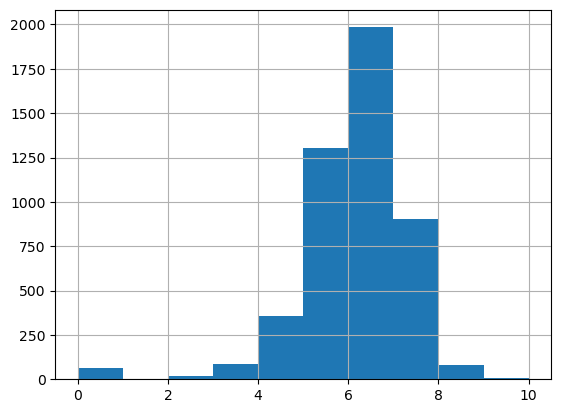

In [736]:
df_clean['vote_average'].hist()

- The average vote of a movie from the database. ~7

<AxesSubplot:>

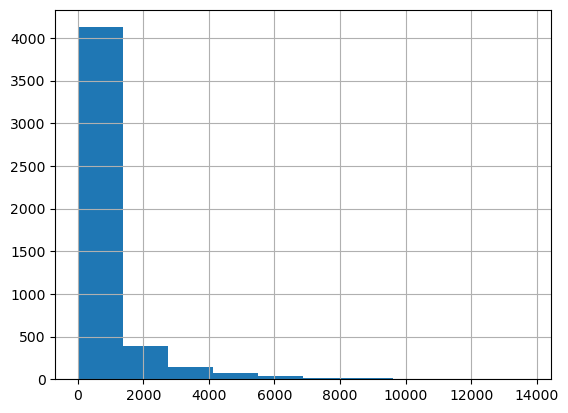

In [737]:
df_clean['vote_count'].hist()

- Majority of amount of votes lie between 0 and 2000 for a movie
- The larger amount of votes the more accurate the rating of a movie would actually be

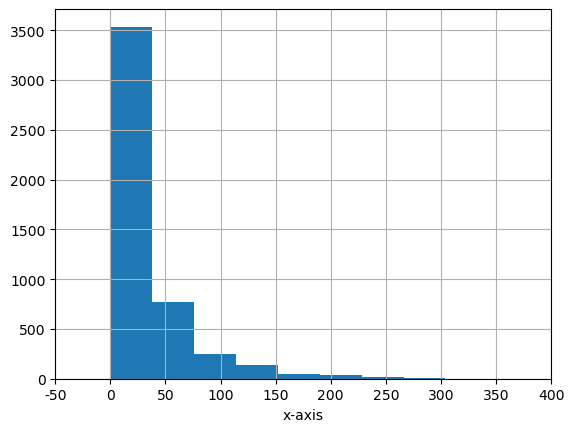

In [738]:
df_clean['budget'].hist()

# Assuming you have a plot already created
plt.xlabel('x-axis')

# Get the current tick labels
ticks = plt.xticks()[0]

# Convert the tick values from 1e8 to 1e6 and format them as strings
new_ticks = ['{:.0f}'.format(tick / 1e6) for tick in ticks]

# Set the new tick labels on the x-axis
plt.xticks(ticks, new_ticks)

# Display the plot
plt.show()

- Majority of movies budgets are 0 - 50 mill
- The higher the budget the more likely the movie will be good quality

## Including Average Rating of Movies into recommendation system alongside Similarity Scores
- Weighted Average, Hybrid Approach


In [739]:
# Normalise Similarity Scores
from sklearn.preprocessing import MinMaxScaler

In [740]:
scaler = MinMaxScaler()

In [741]:
scaled_similarity = df_clean['weighted_sim_score']
scaled_similarity = scaled_similarity.values.reshape(-1,1) #Make 2D
scaled_similarity = scaler.fit_transform(scaled_similarity)

In [742]:
df_clean_2 = df_clean.copy()  # Create a copy of the original dataframe
df_clean_2['scaled_similarity_scores'] = scaled_similarity

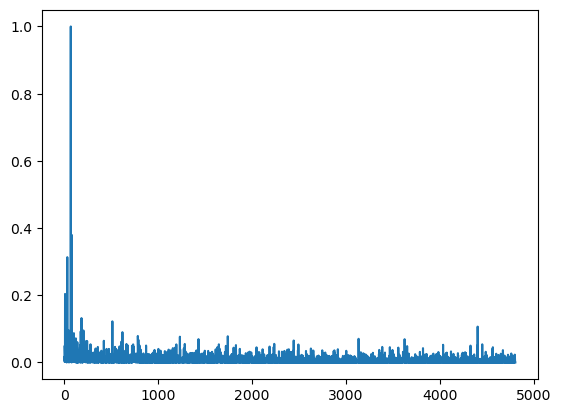

In [743]:
plt.plot(df_clean_2['scaled_similarity_scores'])

`- Need to consider the amount of votes when looking at the average Rating of a movie. 
    - Want to look at the confidence associated with the rating. A higher amount of votes means we are more confident that the movie will have a rating true to its value
    - If a movie has a rating of 10 but only 1 person has voted, it isnt confident that the movie is actually a 10.
- How do we account for uncertainty when sample size (number of votes) is small?`
    - Wilson Score Interval

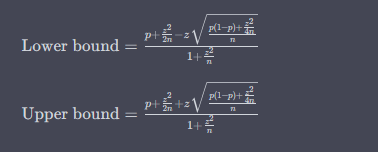
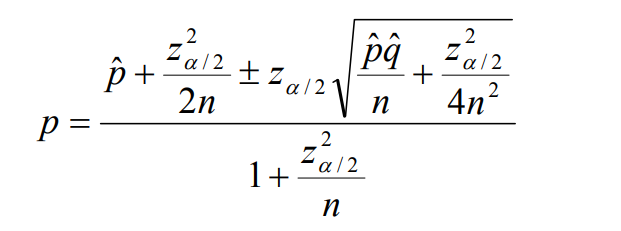
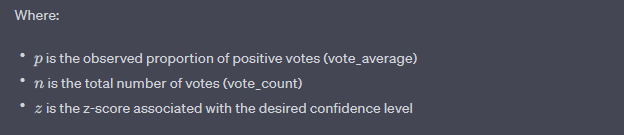

In [744]:
from scipy.stats import norm

In [745]:
#Constants for Wilson Score Interval
confidence_level = 0.95
z = norm.ppf((1+confidence_level) / 2) #Calculates the Z score for a specifide confidence interval

In [747]:
from statsmodels.stats.proportion import proportion_confint

In [748]:
#Average Vote and # of Votes
vote_average = df_clean_2['vote_average'] / 10 #Make it between 0 and 1
vote_count = df_clean_2['vote_count']

In [749]:
# Calculate Wilson score interval for movie rating
df_clean_2['lower_bound'], df_clean_2['upper_bound'] = proportion_confint(vote_average * vote_count, vote_count, method='wilson')



c:\Users\I am Navin\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:89: RuntimeWarning: invalid value encountered in divide
  q_ = count * 1. / nobs
c:\Users\I am Navin\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:134: RuntimeWarning: divide by zero encountered in divide
  denom = 1 + crit2 / nobs
c:\Users\I am Navin\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:135: RuntimeWarning: divide by zero encountered in divide
  center = (q_ + crit2 / (2 * nobs)) / denom
c:\Users\I am Navin\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:136: RuntimeWarning: divide by zero encountered in divide
  dist = crit * np.sqrt(q_ * (1. - q_) / nobs + crit2 / (4. * nobs**2))


In [751]:
pd.set_option('display.max_columns', None)

In [752]:
df_clean_2

,index,title,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text,short,similarity_scores,weighted_sim_score,scaled_similarity_scores,lower_bound,upper_bound
0,0,Avatar,19995,"In the 22nd century, a paraplegic Marine is di...",237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Action Adventure Fantasy Science Fiction In th...,action adventure fantasy science fiction 22 nd...,0.047314,0.094628,0.047314,0.711828,0.728029
1,1,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha...",300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Adventure Fantasy Action Captain Barbossa, lon...",adventure fantasy action captain barbossa long...,0.035453,0.053180,0.026590,0.676330,0.703346
2,2,Spectre,206647,A cryptic message from Bond’s past sends him o...,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Action Adventure Crime A cryptic message from ...,action adventure crime cryptic message bond pa...,0.008412,0.012619,0.006309,0.615734,0.644043
3,3,The Dark Knight Rises,49026,Following the death of District Attorney Harve...,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Action Crime Drama Thriller Following the deat...,action crime drama thriller follow death distr...,0.002779,0.003473,0.001737,0.751120,0.768661
4,4,John Carter,49529,"John Carter is a war-weary, former military ca...",260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,Action Adventure Science Fiction John Carter i...,action adventure science fiction john carter w...,0.018667,0.037335,0.018667,0.589076,0.630526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,El Mariachi,9367,El Mariachi just wants to play his guitar and ...,220000,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,14.269792,1992-09-04,2040920,81.0,"He didn't come looking for trouble, but troubl...",6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,Action Crime Thriller El Mariachi just wants t...,action crime thriller el mariachi want play gu...,0.025556,0.031945,0.015973,0.597702,0.717215
4799,4799,Newlyweds,72766,A newlywed couple's honeymoon is upended by th...,9000,Comedy Romance,,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,Comedy Romance A newlywed couple's honeymoon i...,comedy romance newlywed couple honeymoon upend...,0.000000,0.000000,0.000000,0.224353,0.877440
4800,4800,"Signed, Sealed, Delivered",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",0,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,1.444476,2013-10-13,0,120.0,,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"Comedy Drama Romance TV Movie ""Signed, Sealed,...",comedy drama romance tv movie sign seal delive...,0.000000,0.000000,0.000000,0.325176,0.918690
4801,4801,Shanghai Calling,126186,When ambitious New York attorney Sam is sent t...,0,,,0.857008,2012-05-03,0

In [753]:
#Incorperate Average Rating

#Scale Average Rating
scaled_avgrating = df_clean_2['vote_average']
scaled_avgrating = scaled_avgrating.values.reshape(-1,1) #Make 2D
scaled_avgrating = scaler.fit_transform(scaled_avgrating)

In [754]:
df_clean_2['scaled_avgrating'] = scaled_avgrating

In [756]:
#Weighted Average of The Movie Ratings and the rating Uncertainity
# To account for movies that have a high rating but low voting count, multiply the avg rating by the lower bound of the wilson score interval
weight_avg_ratings = 0.7
weight_rating_uncertainty = 0.3

df_clean_2['weighted_rating_uncertainty'] = (weight_avg_ratings * df_clean_2['scaled_avgrating']) + (weight_rating_uncertainty * df_clean_2['lower_bound'])


In [758]:
#Scale Average Rating
weighted_rating_uncertainty = df_clean_2['weighted_rating_uncertainty']
weighted_rating_uncertainty = weighted_rating_uncertainty.values.reshape(-1,1) #Make 2D

In [759]:
#Weighted Average - Combine Normalised Similarity Ratings and Average Ratings

#Create Different Weights. Similarity would weigh higher for recommending a movie
similarity_weight = 0.8
avgrating_weight = 0.2

#Weighted Average
weighted_avg = (similarity_weight * scaled_similarity) + (avgrating_weight * weighted_rating_uncertainty)

In [760]:
#Add new col for the weighted avg
df_clean_2['weighted_avg'] = weighted_avg

In [761]:
#Sort by Weighted avg
df_sorted = df_clean_2[df_clean_2['weighted_avg'].notna()].sort_values('weighted_avg', ascending=False)


In [762]:
df_sorted = df_sorted.reindex(columns=['index', 'title','weighted_avg','weighted_sim_score', 'similarity_scores', 'id', 'overview', 'budget', 'genres', 'keywords',
       'popularity', 'release_date', 'revenue', 'runtime', 'tagline',
       'vote_average', 'vote_count', 'cast', 'director', 'combined_text'
       ])

In [763]:
df_sorted

,index,title,weighted_avg,weighted_sim_score,similarity_scores,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text
68,68,Iron Man,0.947443,2.000000,1.000000,1726,"After being held captive in an Afghan cave, bi...",140000000,Action Science Fiction Adventure,middle east arms dealer malibu marvel comic su...,120.725053,2008-04-30,585174222,126.0,Heroes aren't born. They're built.,7.4,8776,Robert Downey Jr. Terrence Howard Jeff Bridges...,Jon Favreau,Action Science Fiction Adventure After being h...
79,79,Iron Man 2,0.434920,0.758996,0.379498,10138,With the world now aware of his dual life as t...,200000000,Adventure Action Science Fiction,malibu marvel comic superhero based on comic b...,77.300194,2010-04-28,623933331,124.0,"It's not the armor that makes the hero, but th...",6.6,6849,Robert Downey Jr. Gwyneth Paltrow Don Cheadle ...,Jon Favreau,Adventure Action Science Fiction With the worl...
31,31,Iron Man 3,0.386148,0.626844,0.313422,68721,When Tony Stark's world is torn apart by a for...,200000000,Action Adventure Science Fiction,terrorist war on terror tennessee malibu marve...,77.682080,2013-04-18,1215439994,130.0,Unleash the power behind the armor.,6.8,8806,Robert Downey Jr. Gwyneth Paltrow Don Cheadle ...,Shane Black,Action Adventure Science Fiction When Tony Sta...
7,7,Avengers: Age of Ultron,0.308536,0.407947,0.203973,99861,When Tony Stark tries to jumpstart a dormant p...,280000000,Action Adventure Science Fiction,marvel comic sequel superhero based on comic b...,134.279229,2015-04-22,1405403694,141.0,A New Age Has Come.,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,Joss Whedon,Action Adventure Science Fiction When Tony Sta...
16,16,The Avengers,0.253813,0.265732,0.132866,24428,When an unexpected enemy emerges and threatens...,220000000,Science Fiction Action Adventure,new york shield marvel comic superhero based o...,144.448633,2012-04-25,1519557910,143.0,Some assembly required.,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,Joss Whedon,Science Fiction Action Adventure When an unexp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,4451,Windsor Drive,0.028572,0.000000,0.000000,343409,"River Miller, a mentally unstable actor haunte...",0,Thriller Mystery,woman director,0.504251,2015-06-26,0,90.0,,2.0,1,Samaire Armstrong Anna Gurji Matt Cohen Kyan D...,Natalie Bible',"Thriller Mystery River Miller, a mentally unst..."
4581,4581,Gory Gory Hallelujah,0.021205,0.017639,0.017639,281189,Four actors compete for the role of Jesus - a ...,0,,woman director,0.033883,2003-11-05,0,0.0,,1.0,1,,Sue Corcoran,Four actors compete for the role of Jesus - a...
3689,3689,All Hat,0.015493,0.003361,0.002689,10914,An ex-con returns to his rural Ontario roots a...,0,Action Comedy Drama Western,indian territory horse ranch stetson urbanisie...,0.137535,2007-09-11,0,89.0,,1.0,1,Rachael Leigh Cook Luke Kirby Keith Carradine ...,Leonard Farlinger,Action Comedy Drama Western An ex-con returns ...
2272,2272,Dwegons,0.007038,0.000000,0.000000,239897,Family inherits an old house and to their surp...,0,Animation,,0.485405,2014-01-24,0,98.0,,0.5,1,Melissa Leo Maggie Wheeler Joey D. Vieira R. M...,Tom Walsh,Animation Family inherits an old house and to ...


In [764]:
top_10 = df_sorted.iloc[1:11]

In [765]:
top_10

,index,title,weighted_avg,weighted_sim_score,similarity_scores,id,overview,budget,genres,keywords,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,combined_text
79,79,Iron Man 2,0.434920,0.758996,0.379498,10138,With the world now aware of his dual life as t...,200000000,Adventure Action Science Fiction,malibu marvel comic superhero based on comic b...,77.300194,2010-04-28,623933331,124.0,"It's not the armor that makes the hero, but th...",6.6,6849,Robert Downey Jr. Gwyneth Paltrow Don Cheadle ...,Jon Favreau,Adventure Action Science Fiction With the worl...
31,31,Iron Man 3,0.386148,0.626844,0.313422,68721,When Tony Stark's world is torn apart by a for...,200000000,Action Adventure Science Fiction,terrorist war on terror tennessee malibu marve...,77.682080,2013-04-18,1215439994,130.0,Unleash the power behind the armor.,6.8,8806,Robert Downey Jr. Gwyneth Paltrow Don Cheadle ...,Shane Black,Action Adventure Science Fiction When Tony Sta...
7,7,Avengers: Age of Ultron,0.308536,0.407947,0.203973,99861,When Tony Stark tries to jumpstart a dormant p...,280000000,Action Adventure Science Fiction,marvel comic sequel superhero based on comic b...,134.279229,2015-04-22,1405403694,141.0,A New Age Has Come.,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,Joss Whedon,Action Adventure Science Fiction When Tony Sta...
16,16,The Avengers,0.253813,0.265732,0.132866,24428,When an unexpected enemy emerges and threatens...,220000000,Science Fiction Action Adventure,new york shield marvel comic superhero based o...,144.448633,2012-04-25,1519557910,143.0,Some assembly required.,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,Joss Whedon,Science Fiction Action Adventure When an unexp...
182,182,Ant-Man,0.244991,0.264255,0.132127,102899,Armed with the astonishing ability to shrink i...,130000000,Science Fiction Action Adventure,marvel comic superhero based on comic book aft...,120.093610,2015-07-14,519311965,117.0,Heroes don't get any bigger.,7.0,5880,Paul Rudd Michael Douglas Evangeline Lilly Cor...,Peyton Reed,Science Fiction Action Adventure Armed with th...
26,26,Captain America: Civil War,0.240079,0.246781,0.123390,271110,"Following the events of Age of Ultron, the col...",250000000,Adventure Action Science Fiction,civil war war marvel comic sequel superhero,198.372395,2016-04-27,1153304495,147.0,Divided We Fall,7.1,7241,Chris Evans Robert Downey Jr. Scarlett Johanss...,Anthony Russo,Adventure Action Science Fiction Following the...
511,511,X-Men,0.233066,0.244832,0.122416,36657,"Two mutants, Rogue and Wolverine, come to a pr...",75000000,Adventure Action Science Fiction,mutant marvel comic superhero based on comic b...,4.668910,2000-07-13,296339527,104.0,Evolution Begins,6.8,4097,Patrick Stewart Hugh Jackman Ian McKellen Hall...,Bryan Singer,"Adventure Action Science Fiction Two mutants, ..."
46,46,X-Men: Days of Future Past,0.225532,0.190493,0.095246,127585,The ultimate X-Men ensemble fights a war for t...,250000000,Action Adventure Fantasy Science Fiction,1970s mutant time travel marvel comic based on...,118.078691,2014-05-15,747862775,131.0,"To save the future, they must alter the past",7.5,6032,Hugh Jackman James McAvoy Michael Fassbender J...,Bryan Singer,Action Adventure Fantasy Science Fiction The u...
94,94,Guardians of the Galaxy,0.220008,0.156250,0.078125,118340,"Light years from Earth, 26 years after being a...",170000000,Action Science Fiction Adventure,marvel comic spaceship space outer space orphan,481.098624,2014-07-30,773328629,121.0,All heroes start somewhere.,7.9,9742,Chris Pratt Zoe Saldana Dave Bautista Vin Dies...,James Gunn,Action Science Fiction Adventure Light years f...
85,85,Captain America: The Winter Soldier,0.212697,0.153422,0.076711,100402,After the cataclysmic events in New York with ...,170000000,Action Adventure Science Fiction,washington d.c. future shield marvel comic sup...,72.225265,2014-03-20,714766572,136.0,In heroes we trust.,7.6,5764,Chris Evans

In [766]:
print(top_10['title'])

79                              Iron Man 2
31                              Iron Man 3
7                  Avengers: Age of Ultron
16                            The Avengers
182                                Ant-Man
26              Captain America: Civil War
511                                  X-Men
46              X-Men: Days of Future Past
94                 Guardians of the Galaxy
85     Captain America: The Winter Soldier
Name: title, dtype: object
